# <center> <font style="color:rgb(100,109,254)"> Sign Language Detection</font> </center>


##  <font style="color:rgb(134,19,348)">Import Libraries </font>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pyttsx3

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense,MaxPool2D,Dropout,Flatten,Conv2D,GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# from random import choice,shuffle
# from scipy import stats as st

from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# from collections import deque

##  <font style="color:rgb(134,19,348)"> Step 1: Gather Data, for letter classes.</font>

In [2]:
def gather_data(num_samples):
    
    global la ,lb ,lc ,ld ,le ,lf ,lg ,lh ,li ,lj ,lk ,ll ,lm ,ln ,lo ,lp ,lq ,lr ,ls ,lt ,lu ,lv ,lw ,lx ,ly ,lz ,nothing
    
    # Initialize the camera
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

    # trigger tells us when to start recordin
    
    trigger = False
    
    # Counter keeps count of the number of samples collected
    counter = 0
    
    # This the ROI size, the size of images saved will be box_size -10
    box_size = 234
    
    # Getting the width of the frame from the camera properties
    width = int(cap.get(3))


    while True:
        
        # Read frame by frame
        ret, frame = cap.read()
        
        # Flip the frame laterally
        frame = cv2.flip(frame, 1)
        
        # Break the loop if there is trouble  reading the frame.
        if not ret:
            break
            
        # If counter is equal to the number samples then reset triger and the counter
        if counter == num_samples:
            trigger = not trigger
            counter = 0
        
        # Define ROI for capturing samples
        cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (0, 250, 150), 2)
        
        # Make a resizable window.
        cv2.namedWindow("Collecting images", cv2.WINDOW_NORMAL)
        
        
        # If trigger is True than start capturing the samples
        if trigger:
            
            # Grab only slected roi
            roi = frame[5: box_size-5 , width-box_size + 5: width -5]
            
            # Append the roi and class name to the list with the selected class_name
            eval(class_name).append([roi, class_name])
                                    
            # Increment the counter 
            counter += 1 
        
            # Text for the counter
            text = "Collected Samples of {}: {}".format(class_name, counter)
            
        else:
            text = "Press the letter to collect samples of the letter (eg. 'a' for symbol of a) and '0' for nothing"
        
        # Show the counter on the imaege
        cv2.putText(frame, text, (3, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 1, cv2.LINE_AA)
        
        # Display the window
        cv2.imshow("Collecting images", frame)
        
        # Wait 1 ms
        k = cv2.waitKey(1)
        
        if k == ord('a'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'la'
            la = []
        if k == ord('b'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lb'
            lb = []
        if k == ord('c'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lc'
            lc = []
        if k == ord('d'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'ld'
            ld = []
        if k == ord('e'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'le'
            le = []
        if k == ord('f'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lf'
            lf = []
        if k == ord('g'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lg'
            lg = []
        if k == ord('h'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lh'
            lh = []
        if k == ord('i'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'li'
            li = []
        if k == ord('j'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lj'
            lj = []
        if k == ord('k'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lk'
            lk = []
        if k == ord('l'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'll'
            ll = []
        if k == ord('m'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lm'
            lm = []
        if k == ord('n'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'ln'
            ln = []
        if k == ord('o'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lo'
            lo = []
        if k == ord('p'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lp'
            lp = []
        if k == ord('q'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lq'
            lq = []
        if k == ord('r'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lr'
            lr = []
        if k == ord('s'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'ls'
            ls = []
        if k == ord('t'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lt'
            lt = []
        if k == ord('u'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lu'
            lu = []
        if k == ord('v'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lv'
            lv = []
        if k == ord('w'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lw'
            lw = []
        if k == ord('x'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lx'
            lx = []
        if k == ord('y'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'ly'
            ly = []
        if k == ord('z'):
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'lz'
            lz = []

                    
        # If user press 's' then class_name is set to nothing and trigger set to True
        if k == ord('0'):
            trigger = not trigger
            class_name = 'nothing'
            nothing = []
        
        # Exit if user presses 'esc'
        if k == 27:
            break
            
    #  Release the camera and destroy the window
    cap.release()
    cv2.destroyAllWindows()

In [4]:
no_of_samples = 120
gather_data(no_of_samples)

##  <font style="color:rgb(134,19,348)"> Step 2: (Optional) Visualize the Data:
 </font>

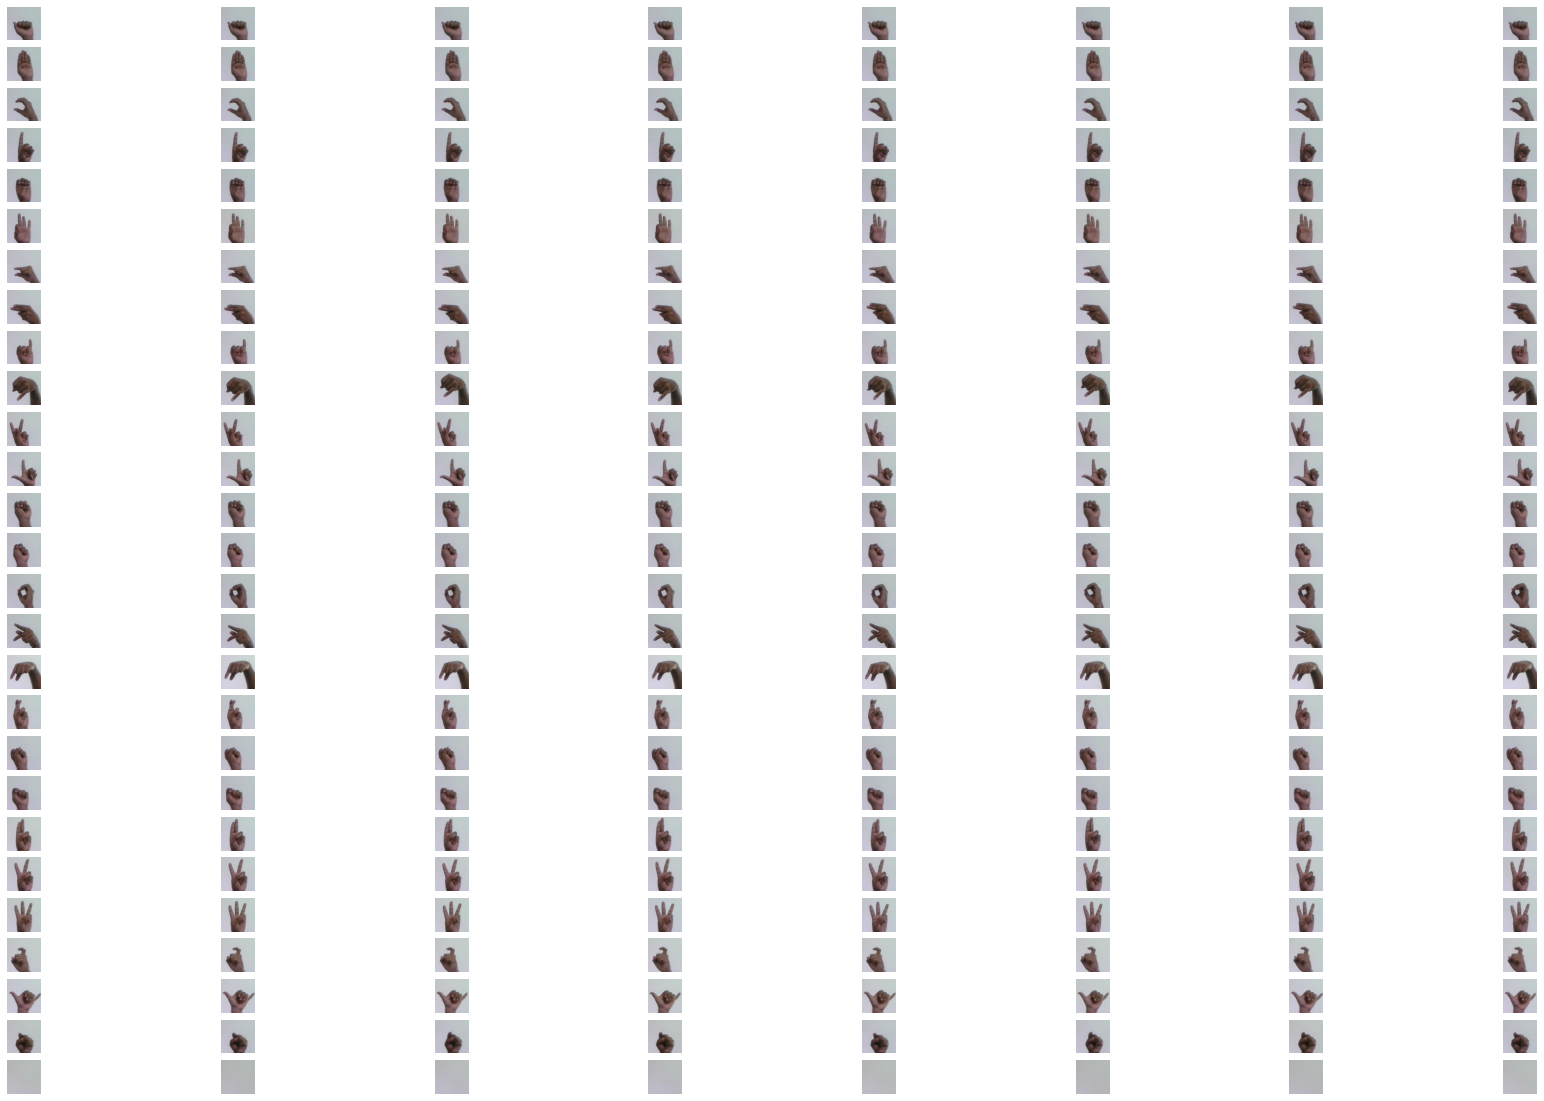

In [6]:
# Set the figure size
plt.figure(figsize=[30,20])

# Set the rows and columns
rows, cols = 27, 8
cls = -1
# Iterate for each class
for each_list in [la ,lb ,lc ,ld ,le ,lf ,lg ,lh ,li ,lj ,lk ,ll ,lm ,ln ,lo ,lp ,lq ,lr ,ls ,lt ,lu ,lv ,lw ,lx ,ly ,lz,nothing]:
    
    # Get 8 random indexes, since we will be showing 8 examples of each class.
    r = np.random.randint(no_of_samples, size=8);
    cls += 1
    # Plot the examples
    for i, example_index in enumerate(r,1):
        plt.subplot(rows,cols,cls*cols + i )
        plt.imshow(each_list[example_index][0][:,:,::-1])
        plt.axis('off')   

##  <font style="color:rgb(134,19,348)"> Step 3: Preprocess Data and Split it:
 </font>

In [7]:
# Combine the labels of all classes together
labels = [tupl[1] for tupl in la] + [tupl[1] for tupl in lb] + [tupl[1] for tupl in lc] + [tupl[1] for tupl in ld] + [tupl[1] for tupl in le] + [tupl[1] for tupl in lf] + [tupl[1] for tupl in lg] + [tupl[1] for tupl in lh] + [tupl[1] for tupl in li] + [tupl[1] for tupl in lj] + [tupl[1] for tupl in lk] + [tupl[1] for tupl in ll] + [tupl[1] for tupl in lm] + [tupl[1] for tupl in ln] + [tupl[1] for tupl in lo] + [tupl[1] for tupl in lp] + [tupl[1] for tupl in lq] + [tupl[1] for tupl in lr] + [tupl[1] for tupl in ls] + [tupl[1] for tupl in lt] + [tupl[1] for tupl in lu] + [tupl[1] for tupl in lv] + [tupl[1] for tupl in lw] + [tupl[1] for tupl in lx] + [tupl[1] for tupl in ly] + [tupl[1] for tupl in lz] + [tupl[1] for tupl in nothing]


# Print out the total number of labels and images.
print('Total Labels: {}'.format(len(labels)))

# Create an encoder Object
encoder = LabelEncoder()

# Convert Lablels to integers. i.e. la = 0, lb = 1, lc = 2, ld = 3, .... nothing = 27 (mapping is done in alphabatical order)
Int_labels = encoder.fit_transform(labels)

# Now the convert the integer labels into one hot format. i.e. 0 = [1,0,0,0]  etc.
one_hot_labels = to_categorical(Int_labels, 27)


Total Labels: 3240


In [8]:
# Combine the images of all classes together
images = [tupl[0] for tupl in la] + [tupl[0] for tupl in lb] + [tupl[0] for tupl in lc] + [tupl[0] for tupl in ld] + [tupl[0] for tupl in le] + [tupl[0] for tupl in lf] + [tupl[0] for tupl in lg] + [tupl[0] for tupl in lh] + [tupl[0] for tupl in li] + [tupl[0] for tupl in lj] + [tupl[0] for tupl in lk] + [tupl[0] for tupl in ll] + [tupl[0] for tupl in lm] + [tupl[0] for tupl in ln] + [tupl[0] for tupl in lo] + [tupl[0] for tupl in lp] + [tupl[0] for tupl in lq] + [tupl[0] for tupl in lr] + [tupl[0] for tupl in ls] + [tupl[0] for tupl in lt] + [tupl[0] for tupl in lu] + [tupl[0] for tupl in lv] + [tupl[0] for tupl in lw] + [tupl[0] for tupl in lx] + [tupl[0] for tupl in ly] + [tupl[0] for tupl in lz] + [tupl[0] for tupl in nothing]

# Normalize the images by dividing by 255, now our images are in range 0-1. This will help in training.
images = np.array(images, dtype="float") / 255.0

# Now we're splitting the data, 75% for training and 25% for testing.
(trainX, testX, trainY, testY) = train_test_split(images, one_hot_labels, test_size=0.20, random_state=50)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.20, random_state=50)

# Empty memory from RAM
images = []


##  <font style="color:rgb(134,19,348)">Step 4: Prepare Our Model for Fine Tuning:
 </font>

In [9]:
# This is the input size which our model accepts.
image_size = 224

# Loading pre-trained NASNETMobile Model without the head by doing include_top = False
N_mobile = tf.keras.applications.NASNetMobile( input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')

# Freeze the whole model 
N_mobile.trainable = False
    
# Adding our own custom head
# Start by taking the output feature maps from NASNETMobile
x = N_mobile.output

# Convert to a single dimensional vector by Global Average Pooling. 
# We could also use Flatten()(x) GAP is more effective reduces params and controls overfitting.
x = GlobalAveragePooling2D()(x)

# Adding a dense layer with 512 units
x = Dense(712, activation='relu')(x) 

# Dropout 20% of the activations, helps reduces overfitting
x = Dropout(0.40)(x)

# The fianl layer will contain 27 output units (no of units = no of classes) with softmax function.
preds = Dense(27,activation='softmax')(x) 

# Construct the full model
model = Model(inputs=N_mobile.input, outputs=preds)

# Check the number of layers in the final Model
print ("Number of Layers in Model: {}".format(len(model.layers[:])))

Number of Layers in Model: 773


##  <font style="color:rgb(134,19,348)"> Step 5: Train Our Model:
 </font>

In [10]:
# Adding transformations that I know would help, you can feel free to add more.
# I'm doing horizontal_flip = False, incase you aren't sure which hand you would be using you can make that True.

augment = ImageDataGenerator( 
    
        rotation_range=30,
        zoom_range=0.25,
        width_shift_range=0.10,
        height_shift_range=0.10,
        shear_range=0.10,
        horizontal_flip=False,    
        fill_mode="nearest"
)

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy','AUC'])

In [12]:
# Set batchsize according to your system
epochs = 20
batchsize = 20

# Start training
history = model.fit(x=augment.flow(trainX, trainY, batch_size=batchsize), validation_data=(valX, valY), 
steps_per_epoch= len(trainX) // batchsize, epochs=epochs)

# Use model.fit_generator function instead if TF version < 2.2
#history = model.fit_generator(x = augment.flow(trainX, trainY, batch_size=batchsize), validation_data=(testX, testY), 
#steps_per_epoch= len(trainX) // batchsize, epochs=epochs)

Epoch 1/20
103/103 [==============================] - 105s 1s/step - loss: 2.4967 - accuracy: 0.3950 - auc: 0.8500 - val_loss: 1.3376 - val_accuracy: 0.8921 - val_auc: 0.9971
Epoch 2/20
103/103 [==============================] - 95s 923ms/step - loss: 1.1892 - accuracy: 0.7983 - auc: 0.9903 - val_loss: 0.4924 - val_accuracy: 0.9827 - val_auc: 0.9999
Epoch 3/20
103/103 [==============================] - 92s 895ms/step - loss: 0.6310 - accuracy: 0.9172 - auc: 0.9981 - val_loss: 0.2259 - val_accuracy: 0.9923 - val_auc: 1.0000
Epoch 4/20
103/103 [==============================] - 95s 925ms/step - loss: 0.4214 - accuracy: 0.9425 - auc: 0.9991 - val_loss: 0.1446 - val_accuracy: 0.9961 - val_auc: 1.0000
Epoch 5/20
103/103 [==============================] - 96s 934ms/step - loss: 0.3060 - accuracy: 0.9518 - auc: 0.9994 - val_loss: 0.0940 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 6/20
103/103 [==============================] - 93s 906ms/step - loss: 0.2235 - accuracy: 0.9674 - auc: 0.9997 

##  <font style="color:rgb(134,19,348)"> Step 6: Check our Accuracy, Loss graphs during Training.
 </font>

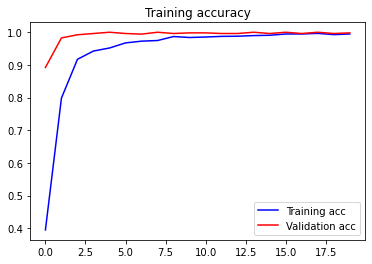

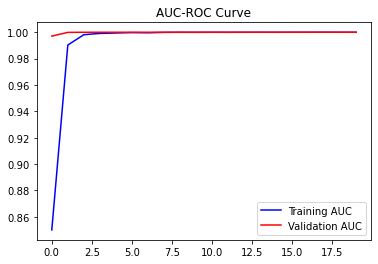

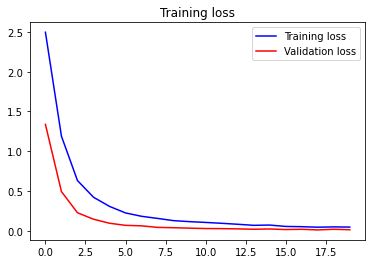

In [13]:
# Plot the accuracy and loss curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('AUC-ROC Curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

## <font style="color:rgb(134,19,348)"> Step 7: Testing & save the model</font>

In [17]:
test_pred = model.predict(testX)
test_pred = [np.argmax(x) for x in test_pred]
test_y = [np.argmax(x) for x in testY]


In [18]:
precision = precision_score(test_y,test_pred,average='micro')
recall = recall_score(test_y,test_pred,average='micro')
accuracy = accuracy_score(test_y,test_pred)
f1 = f1_score(test_y,test_pred,average='macro')
print("Accuracy of the model is :" ,accuracy)
print("Recall of the model is :" ,recall)
print("Precision of the model is :" ,precision)
print("F1 score of the model is :" ,f1)

Accuracy of the model is : 1.0
Recall of the model is : 1.0
Precision of the model is : 1.0
F1 score of the model is : 1.0


In [20]:
conf_matrix = confusion_matrix(test_y, test_pred)
report = classification_report(test_y, test_pred)
print('Result for SVM is:')
print(conf_matrix, '\n', report)

Result for SVM is:
[[32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 

####  <font style="color:rgb(134,19,348)"> Save the model </font>

In [21]:
model.save("sign-lang.h5", overwrite=True)

##  <font style="color:rgb(134,19,348)"> Step 8: Load Pre-Trained model</font>
#### <font style="color:rgb(134,19,348)"> This can avoid training each time</font>

####  <font style="color:rgb(134,19,348)"> Load the model </font>

In [2]:
model = load_model("sign-lang.h5")

##  <font style="color:rgb(134,19,348)"> Step 9: Test on Live Webcam Feed:
 </font>

In [3]:
engine = pyttsx3.init()
voice_id = "HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0"
voice_id_2 = "HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0"
engine.setProperty('voice', voice_id_2)

In [9]:
# This list will be used to map probabilities to class names, Label names are in alphabatical order.
label_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't','u', 'v', 'w', 'x', 'y', 'z', 'nothing']

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
box_size = 234
width = int(cap.get(3))
word = ""
prev_target = 26
target = 26
count = 0
prob1 = 0
res = ' '
while True:
    
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.flip(frame, 1)
           
    cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (0, 250, 150), 2)
        
    cv2.namedWindow("Sign Language", cv2.WINDOW_NORMAL)

    roi = frame[5: box_size-5 , width-box_size + 5: width -5]
    
    # Normalize the image like we did in the preprocessing step, also convert float64 array.
    roi = np.array([roi]).astype('float64') / 255.0
 
    # Get model's prediction.
    pred = model.predict(roi)
    predict = []
    probabil = []
    
    # Get the index of the target class.
    target_index = np.argmax(pred[0])
    prob = np.max(pred[0])
    count+=1
    #for stable outcome
    if count%30==0:
        count=0
        predict.append(target_index)
        probabil.append(prob)
        prev_target = target
        target = np.max(predict)
    
        # Get the probability of the target class
        prob1 = sum(probabil)/len(probabil)

        # Show results
        res=label_names[target]
        if target != prev_target:
            if res != "nothing":
                word+=res
            else:
                word += " "
    cv2.putText(frame, "prediction: {} {:.2f}%".format(label_names[target], prob1*100 ),(10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.90, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "Text Predicted: {}".format(word) , (3, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 1, cv2.LINE_AA)
    
    cv2.imshow("Sign Language", frame)
    
   
    k = cv2.waitKey(1)
    if k == ord('a'):
        engine.say(word)
        engine.runAndWait()
        word=""
    if k == ord('r'):
        word+= res
    if k == ord('q'):
        engine.say(word)
        engine.runAndWait()
        engine.stop()
        break
cap.release()
cv2.destroyAllWindows()